# Cours 2 : Algorithmes non supervisés 

## Préambule

Les objectifs de cette séance (3h) sont :
* Mettre en application un modèle non-supervisé (K-means et C.A.H)

## Préparation du workspace

### Import de librairies 

In [ ]:
# Données
import numpy as np
import pandas as pd

# Graphiques
import seaborn as sns

sns.set()
import matplotlib.pyplot as plt  # noqa: E402
import plotly.express as px
import plotly.graph_objects as gp
from scipy.cluster.hierarchy import dendrogram, linkage  # noqa: E402

# Statistiques
from scipy.stats import chi2_contingency  # noqa: E402, F401

# Machine Learning
from sklearn.cluster import AgglomerativeClustering, KMeans  # noqa: E402


### Constantes

In [2]:
input_path = "./1_inputs"
output_path = "./2_outputs"

## Exercice (implémentation des exercices du support de cours)

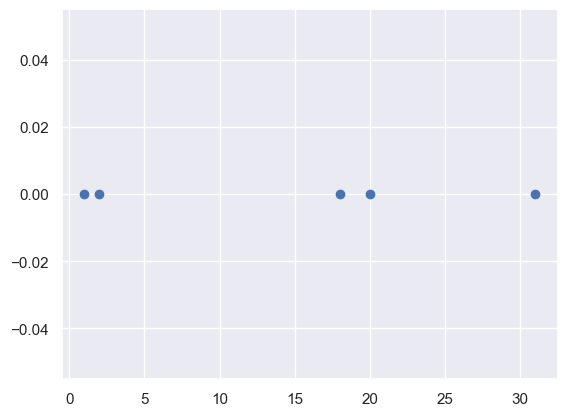

In [3]:
#Défintion de E
x = [1, 2, 18, 20, 31]

#Représentation graphique
y=[0, 0, 0, 0, 0]
plt.scatter(x, y)
plt.show()

### K-means : Question 1 

**Déterminer la partition optimale par k-means en prenant pour centres initiaux les éléments 1, 2, 18**

In [4]:
#Définition des centres initiaux
init_points = np.array([1, 2, 18])

#Itinitialisation algo
kmeans = KMeans(init=init_points.reshape(-1,1),
                n_clusters=3,
                n_init = 1)

In [5]:
#Transformation des données : plusieurs échantillons de 1 dimension
data_x = np.array(x)
data_x = data_x.reshape(-1,1)

# Fitting
kmeans.fit(data_x)

KMeans(init=array([[ 1],
       [ 2],
       [18]]), n_clusters=3, n_init=1)

In [6]:
#Centroides finaux
final_centroids =  kmeans.cluster_centers_
labels = kmeans.labels_

final_centroids

array([[ 1.],
       [ 2.],
       [23.]])

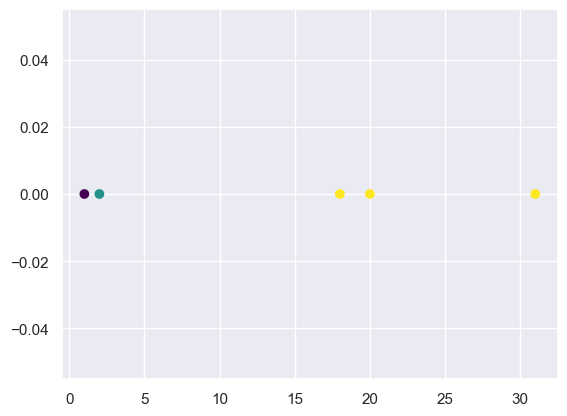

In [7]:
#Représentation Graphique
plt.scatter(x, y, c=labels, cmap='viridis')
plt.show()

### K-means : Question 2

**Déterminer la partition optimale par k-means en prenant pour centres initiaux les éléments 18, 20, 31**

In [8]:
#Définition des centres initiaux
init_points = np.array([18, 20, 31])

#Itinitialisation algo
kmeans = KMeans(init=init_points.reshape(-1,1),
                n_clusters=3,
                n_init = 1)

#Transformation des données : plusieurs échantillons de 1 dimension
data_x = np.array(x)
data_x = data_x.reshape(-1,1)

# Fitting
kmeans.fit(data_x)

#Centroides finaux
final_centroids =  kmeans.cluster_centers_
labels = kmeans.labels_

final_centroids

array([[ 1.5],
       [19. ],
       [31. ]])

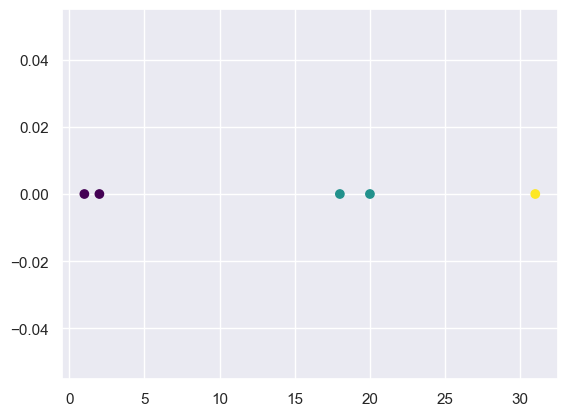

In [ ]:
#Représentation Graphique
plt.scatter(x, y, c=labels, cmap='viridis')
plt.show()

### K-means : Question 3

**Déterminer la partition optimale par k-means en prenant comme partition initiale {{1},{2,18},{20,31}}**

In [10]:
#Définition des centres initiaux
init_points = np.array([1, np.mean([2, 18]), np.mean([20, 31])])

#Itinitialisation algo
kmeans = KMeans(init=init_points.reshape(-1,1),
                n_clusters=3,
                n_init=1)

#Transformation des données : plusieurs échantillons de 1 dimension
data_x = np.array(x)
data_x = data_x.reshape(-1,1)

# Fitting
kmeans.fit(data_x)

#Centroides finaux
final_centroids =  kmeans.cluster_centers_
labels = kmeans.labels_

final_centroids

array([[ 1.5],
       [19. ],
       [31. ]])

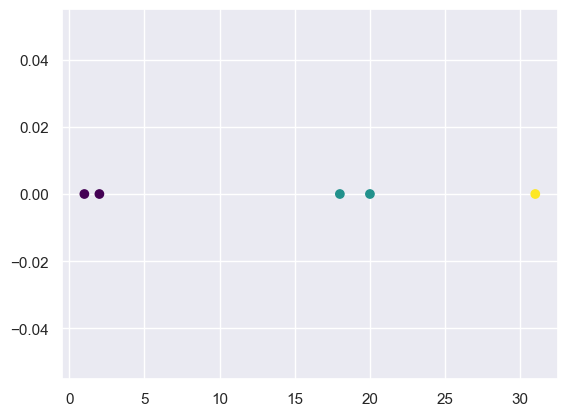

In [11]:
#Représentation Graphique
plt.scatter(x, y, c=labels, cmap='viridis')
plt.show()

### Classification Ascendante Hiérarchique avec le lien simple

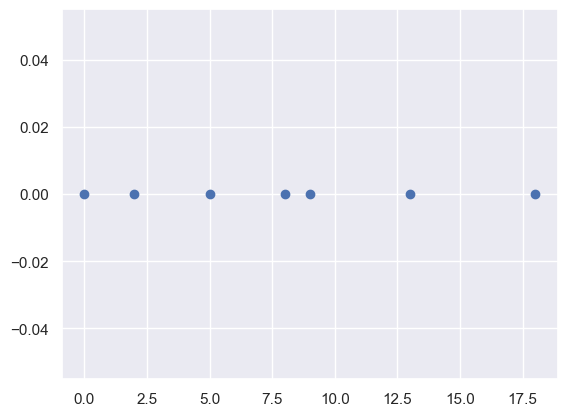

In [12]:
#Défintion de E
x = [0, 2, 5, 8, 9, 13, 18]

#Représentation graphique
y=[0, 0, 0, 0, 0, 0, 0]
plt.scatter(x, y)
plt.show()

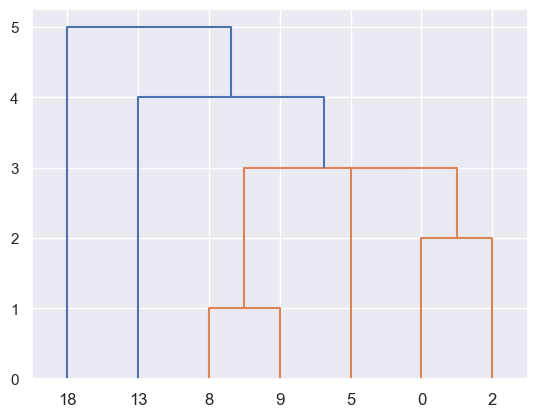

In [13]:
#Calcul de CAH avec lien simple
data = list(zip(x, strict=False))

linkage_data = linkage(data, method='single', metric='euclidean')
dendrogram(linkage_data, labels=x)

plt.show()

[0 0 0 0 0 2 1]


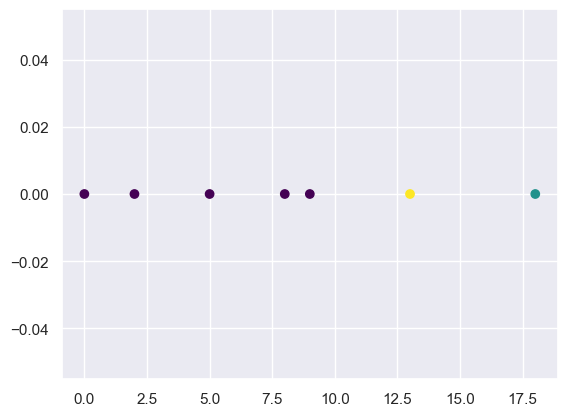

In [ ]:
#Calcul de la partition de l'espace
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='single')

labels = hierarchical_cluster.fit_predict(data)
print(labels)

#Représentation Graphique
plt.scatter(x, y, c=labels, cmap='viridis')
plt.show()

### Classification Ascendante Hiérarchique avec le lien complet

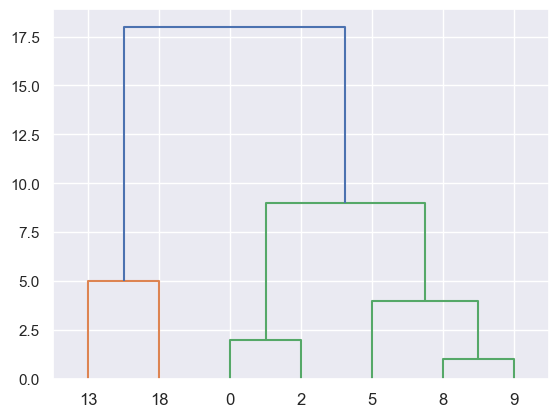

In [15]:
#Calcul de CAH avec lien complet
data = list(zip(x, strict=False))

linkage_data = linkage(data, method='complete', metric='euclidean')
dendrogram(linkage_data, labels=x)

plt.show()

[2 2 1 1 1 0 0]


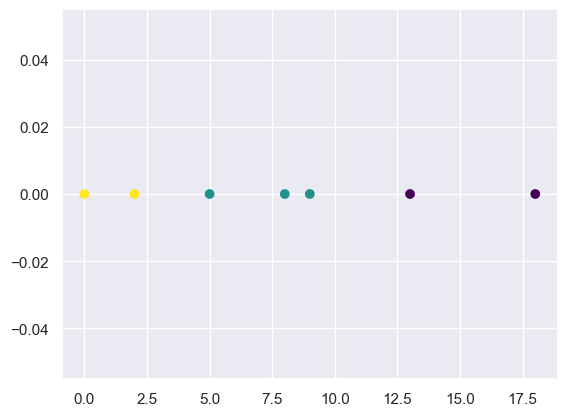

In [ ]:
#Calcul de la partition de l'espace
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='complete')

labels = hierarchical_cluster.fit_predict(data)
print(labels)

#Représentation Graphique
plt.scatter(x, y, c=labels, cmap='viridis')
plt.show()

## K-means: Cas pratique

### Import des données

In [17]:
path = input_path + '/base_retraitee.csv'
data_retraitee = pd.read_csv(path, sep=",", decimal=".")

# Group by ZONE_RISQUE and aggregate the necessary columns
data = data_retraitee.groupby(["ZONE_RISQUE"], as_index=False).agg({
    'NB': 'sum',
    'CHARGE': 'sum',
    'EXPO': 'sum'
})

# Calculate derived metrics
data["FREQ"] = data["NB"] / data["EXPO"]
data["FREQ"] = data["FREQ"].fillna(0)

data["CM"] = data["CHARGE"] / data["NB"]
data["CM"] = data["CM"].fillna(0)

data["FREQxCHARGE"] = data["FREQ"] * data["CHARGE"]
data["FREQxCHARGE"] = data["FREQxCHARGE"].fillna(0)

data

ZONE_RISQUE   NB      CHARGE          EXPO      FREQ            CM  \
0            A  236  1174911.57  9.864309e+05  0.000239   4978.438856   
1            B  181  1146823.23  9.092434e+05  0.000199   6336.039945   
2            C  284  1926300.00  1.356655e+06  0.000209   6782.746479   
3            D   83   455800.64  3.147680e+05  0.000264   5491.573976   
4            E   20   181747.82  1.378742e+05  0.000145   9087.391000   
5            F    1    19418.42  1.212972e+04  0.000082  19418.420000   
6            G    5    29820.87  2.693550e+04  0.000186   5964.174000   
7            H   14    86476.90  4.617415e+04  0.000303   6176.921429   
8            I    4    32686.63  1.398137e+04  0.000286   8171.657500   
9            J   12    75580.99  2.869872e+04  0.000418   6298.415833   
10           K   17    87411.64  7.289687e+04  0.000233   5141.861176   
11           L    7    22684.08  2.487761e+04  0.000281   3240.582857   
12           M    1     6352.66  1.010776e+03  0.000989   6352.660000   
13           R    0        0.00  7.291995e+02  0.000000      0.000000   
14           S    0        0.00  1.783620e+03  0.000000      0.000000   
15           T    1     3053.17  3.044156e+03  0.000328   3053.170000   
16           X    0        0.00  1.627180e+03  0.000000      0.000000   

    FREQxCHARGE  
0    281.093316  
1    228.294222  
2    403.248718  
3    120.188374  
4     26.364305  
5      1.600897  
6      5.535607  
7     26.219790  
8      9.351478  
9     31.603219  
10    20.384933  
11     6.382789  
12     6.284934  
13     0.000000  
14     0.000000  
15     1.002961  
16     0.000000

**Exercice :** Regrouper les zones géographiques en 5 zones homogènes en termes :
* Fréquence de sinistres (La fréquence est égale au Nombre de sinistres divisé par l'exposition)
* Charge 
* Fréquence de sinistres x Charge  
  
A chaque fois :
* Afficher les coordonnées des centroïdes
* Représenter graphiquement la partition obtenue

### Regroupement de zones selon la fréquence

In [18]:
# Initialisation de l'algorithme
kmeans_FREQ = KMeans(init='random', n_clusters=5, n_init=1, random_state=42, max_iter=300)

# Transformation des données : plusieurs échantillons de 1 dimension
data_freq = data["FREQ"].to_numpy()
data_freq = data_freq.reshape(-1, 1)

# Fitting
kmeans_FREQ.fit(data_freq)

# Centroïdes
print("Coordonnées des centroïdes : ")
print(kmeans_FREQ.cluster_centers_)
# Itérations nécessaire pour la résolution
print("Nombre d'itérations réalisées : ")
print(kmeans_FREQ.n_iter_)
# Classes
print("Partition : ")
print(kmeans_FREQ.labels_)

Coordonnées des centroïdes : 
[[1.45059813e-04]
 [2.06105405e-05]
 [9.89338927e-04]
 [3.13499008e-04]
 [2.13297250e-04]]
Nombre d'itérations réalisées : 
3
Partition : 
[4 4 4 3 0 1 4 3 3 3 4 3 2 1 1 3 1]


In [19]:
# Visualisation
data["Cluster_FREQ"] = kmeans_FREQ.labels_
data["Cluster_FREQ"] = data["Cluster_FREQ"].astype(str)
data["Y"] = 0

fig = px.scatter(data, x="FREQ", y="Y", color="Cluster_FREQ")
fig.show()

### Regroupement de zones selon le coût moyen

In [20]:
# Initialisation de l'algorithme
kmeans_CM = KMeans(init='random', n_clusters=5, n_init=1, random_state=42)

# Transformation des données : plusieurs échantillons de 1 dimension
data_cm = data['CM'].to_numpy()
data_cm = data_cm.reshape(-1,1)

# Fitting
kmeans_CM.fit(data_cm)

# Centroïdes
print("Coordonnées des centroïdes : ")
print(kmeans_CM.cluster_centers_)
# Itérations nécessaire pour la résolution
print("Nombre d'itérations réalisées : ")
print(kmeans_CM.n_iter_)
# Classes
print("Partition : ")
print(kmeans_CM.labels_)

Coordonnées des centroïdes : 
[[ 5946.98129932]
 [    0.        ]
 [ 8629.52425   ]
 [ 3146.87642857]
 [19418.42      ]]
Nombre d'itérations réalisées : 
6
Partition : 
[0 0 0 0 2 4 0 0 2 0 0 3 0 1 1 3 1]


In [21]:
# Visualisation
data["Cluster_CM"] = kmeans_CM.labels_
data["Cluster_CM"] = data["Cluster_CM"].astype(str)
data["Y"] = 0

fig = px.scatter(data, x="FREQ", y="Y", color="Cluster_CM")
fig.show()

### Regroupement de zones selon (fréquence; le coût moyen)

In [22]:
# Initialisation de l'algorithme
kmeans_FREQ_CM = KMeans(init='random', n_clusters=5, n_init=1, random_state=42, max_iter=300)

# Transformation des données : plusieurs échantillons de 1 dimension
data_x = data['FREQxCHARGE'].to_numpy()
data_x = data_x.reshape(-1,1)

# Fitting
kmeans_FREQ_CM.fit(data_x)

# Centroïdes
print("Coordonnées des centroïdes : ")
print(kmeans_FREQ_CM.cluster_centers_)
# Itérations nécessaire pour la résolution
print("Nombre d'itérations réalisées : ")
print(kmeans_FREQ_CM.n_iter_)
# Classes
print("Partition : ")
print(kmeans_FREQ_CM.labels_)

Coordonnées des centroïdes : 
[[  6.88870225]
 [  0.52077154]
 [ 26.14306157]
 [120.18837399]
 [304.21208557]]
Nombre d'itérations réalisées : 
4
Partition : 
[4 4 4 3 2 1 0 2 0 2 2 0 0 1 1 1 1]


In [23]:
# Visualisation
data["Cluster_FREQ_CM"] = kmeans_FREQ_CM.labels_
data["Cluster_FREQ_CM"] = data["Cluster_FREQ_CM"].astype(str)

fig = px.scatter(data, x="FREQ", y="CHARGE", color="Cluster_FREQ_CM")
fig.show()

## C.A.H : Cas pratique

**Exercice :** Comparer les résultats obtenus via K-means à ceux d'une C.A.H (lien simple) pour la fréquence et (fréquence; coût moyen)
  
A chaque fois :
* Tracer le dendrogramme associé
* Représenter graphiquement la partition obtenue

### Regroupement de zones selon la fréquence

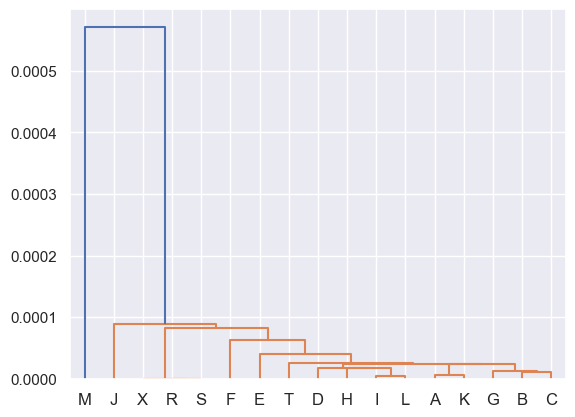

In [28]:
#Calcul de CAH avec lien simple
data_x = data['FREQ'].to_numpy()
data_x = data_x.reshape(-1,1)

linkage_data = linkage(data_x, method='single', metric='euclidean')
dendrogram(linkage_data, labels=np.array(data['ZONE_RISQUE']))

plt.show()

In [ ]:
# Calcul de la partition de l'espace
hierarchical_cluster = AgglomerativeClustering(
    n_clusters=5, metric="euclidean", linkage="single"
)

labels = hierarchical_cluster.fit_predict(data_x)
print(pd.DataFrame({"ZONE_RISQUE": data['ZONE_RISQUE'], "Cluster": labels}))


   ZONE_RISQUE  Cluster
0            A        0
1            B        0
2            C        0
3            D        0
4            E        0
5            F        4
6            G        0
7            H        0
8            I        0
9            J        2
10           K        0
11           L        0
12           M        3
13           R        1
14           S        1
15           T        0
16           X        1


In [34]:
# Visualisation
data["Cluster_FREQ"] = labels
data["Cluster_FREQ"] = data["Cluster_FREQ"].astype(str)
data["Y"] = 0

fig = px.scatter(data, x="FREQ", y="Y", color="Cluster_FREQ")
fig.show()

### Regroupement de zones selon (fréquence; le coût moyen)

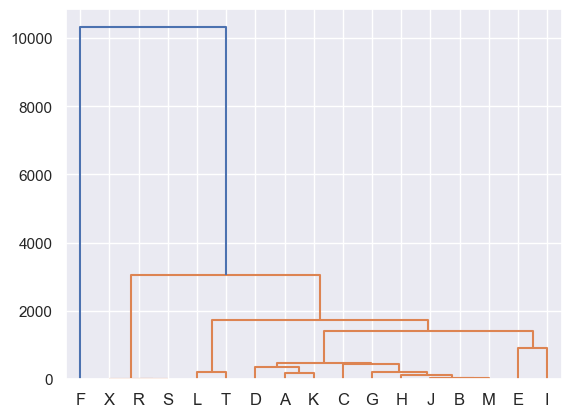

In [35]:
# Calcul de CAH avec lien simple
data_x = data[["FREQ", "CM"]].to_numpy()
data_x = data_x.reshape(-1, 2)

linkage_data = linkage(data_x, method="single", metric="euclidean")
dendrogram(linkage_data, labels=np.array(data["ZONE_RISQUE"]))

plt.show()


In [ ]:
# Calcul de la partition de l'espace
hierarchical_cluster = AgglomerativeClustering(
    n_clusters=5, metric="euclidean", linkage="single"
)

labels = hierarchical_cluster.fit_predict(data_x)
print(pd.DataFrame({"ZONE_RISQUE": data["ZONE_RISQUE"], "Cluster": labels}))

   ZONE_RISQUE  Cluster
0            A        1
1            B        1
2            C        1
3            D        1
4            E        0
5            F        3
6            G        1
7            H        1
8            I        0
9            J        1
10           K        1
11           L        4
12           M        1
13           R        2
14           S        2
15           T        4
16           X        2


In [ ]:
# Visualisation
data["Cluster_FREQ_CHARGE"] = labels
data["Cluster_FREQ_CHARGE"] = data["Cluster_FREQ_CHARGE"].astype(str)

fig = px.scatter(data, x="FREQ", y="CHARGE", color="Cluster_FREQ_CHARGE")
fig.show()

## Application  : création de Model Points (K-means)

Dans certains cas, il se peut que la modélisation ligne par ligne ne soit pas adaptée. C'est le cas des produits collectifs en assurance ou lorsque le nombre d'individus est trop important.  
Dans ce cas de figure, il est nécessaire d'agréger l'information afin d'avoir des "individus type". Chacun de ces individus est appelé *Model Point*.  
L'algorithme des k-means peut s'avérer utile pour le regroupement d'individus sous forme de *Mode Points* lorsque les variables explicatives sont numériques.  
  
Afin d'illustre ce propos, nous agrègerons la base de données selon les variables ANNEE_CTR, AGE_ASSURE_PRINCIPAL, ANCIENNETE_PERMIS et ANNEE_CONSTRUCTION afin de créer 100 Model Points.  

**Exercice :** Construire la nouvelle base de modélisation (les nouveaux individus deviennent les Model Points et chacune de modalités devient le centroïde de la classe).

In [38]:
# Sélection des variables
data_source_MP = data_retraitee[
    [
        "ANNEE_CTR",
        "AGE_ASSURE_PRINCIPAL",
        "ANCIENNETE_PERMIS",
        "ANNEE_CONSTRUCTION",
        "NB",
        "EXPO",
        "CHARGE",
    ]
]


In [39]:
# Agrégation sous forme de MP
# Itinitialisation
kmeans = KMeans(n_clusters=100, max_iter=500)

# Sélection des données
data_x = data_source_MP[
    ["ANNEE_CTR", "AGE_ASSURE_PRINCIPAL", "ANCIENNETE_PERMIS", "ANNEE_CONSTRUCTION"]
]
# Fitting
kmeans.fit(data_x)

# Centroïdes
print("Nombre d'itérations réalisées : ")
print(kmeans.n_iter_)

Nombre d'itérations réalisées : 
41


In [40]:
# Construction de la nouvelle base de modélisation

# Nouvelles variables explicatives
base_MP = pd.DataFrame(
    kmeans.cluster_centers_,
    columns=[
        "ANNEE_CTR",
        "AGE_ASSURE_PRINCIPAL",
        "ANCIENNETE_PERMIS",
        "ANNEE_CONSTRUCTION",
    ],
)


In [41]:
# Ajout du nombre de sinistres, exposition et CHARGE par classe
data_source_MP["Cluster"] = kmeans.labels_
data_sinistralite_MP = data_source_MP[["Cluster", "NB", "EXPO", "CHARGE"]]

data_sinistralite_MP = data_sinistralite_MP.groupby(["Cluster"], as_index=False).sum()


/var/folders/tp/_ld5_pzs6nx6mv1pbjhq1l740000gn/T/ipykernel_60807/1945959780.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
# Joiture des tables
base_MP = base_MP.merge(data_sinistralite_MP, left_index=True, right_on="Cluster")

base_MP = base_MP.iloc[:, [4, 0, 1, 2, 3, 5, 6, 7]]
base_MP.head()


Cluster    ANNEE_CTR  AGE_ASSURE_PRINCIPAL  ANCIENNETE_PERMIS  \
0        0  2019.307393             26.023346          13.019455   
1        1  2019.185629             56.634731          34.640719   
2        2  2019.251282             45.446154          63.061538   
3        3  2019.496894             43.173913          27.515528   
4        4  2018.009174             63.302752          48.211009   

   ANNEE_CONSTRUCTION  NB          EXPO     CHARGE  
0         2017.307393  14  70582.726776   76623.37  
1         2017.323353  13  48258.046448   94446.05  
2         2017.220513  18  52378.409836  180511.41  
3         2017.242236   8  43450.144809   70994.74  
4         2014.458716   3  31148.942623   14771.70